Atividade 02 da disciplina de Visão Robótica

Discente: Henrique Antônio Guanais Corneau

# Calibração de Câmera

1. Utilizando um padrão xadrez e as funções de calibração do OpenCv
calibre a câmera do seu celular (ou uma webcam).
2. Informe os parâmetros intrínsecos da câmera
3. Utilize os parâmetros de distorção para corrigir as imagens obtidas

• Bônus: acrescente uma distorção radial à todas imagens
obtidas e observe se a calibração consegue recuperar os
valores das constantes

Primeiramente, é necessário tirar as fotos do padrão Chessboard com a câmera que será calibrada. Para isso, foi usado um ChessBoard 7x10 e as 21 imagens foram salvas em 'chessboard_images/'.

In [7]:
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt

In [ ]:
cap = cv2.VideoCapture(2)
cont = 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('s'):
        cv2.imwrite(f'chessboard_images/frame{cont}.png', frame)
        cont += 1
    if cv2.waitKey(1) == ord('q'):
        break

Primeiramente, são declarados alguns parâmetros e variáveis essenciais para a elaboração do programa.

`CBROW = 6`
`CBCOL = 9` definem o número de linhas e de colunas do ChessBoard, porém esse número não são o número de quadrados, e sim a quantidade de cantos que tem entre os quadrados.

`criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)` especifica o critério de parada para o processo de refinamento de cantos do padrão ChessBoard.
```
objp = np.zeros((CBROW * CBCOL, 3), np.float32)
objp[:, :2] = np.mgrid[0:CBCOL, 0:CBROW].T.reshape(-1, 2)
```
Definem o formato da matriz de pontos 3D do padrão chessboard, armazenando coordenadas xyz de cada ponto, no caso como se trata de um ChessBoard 6x9, são 54 pontos.

`objpoints = []`
`imgpoints = []` armazenam os pontos 3D do mundo real e os pontos 2D do plano da imagem, respectivamente.

Após isso, serão percorridas através de um laço de repetição todas as imagens tiradas previamente, as imagens serão primeiramente convertidas para tons de cinza. Depois, `ret, corners = cv2.findChessboardCorners(gray, (CBCOL,CBROW)` nessa linha os cantos do ChessBoard serão procurados na imagem, em que os argumentos são: a imagem em tons de cinza e o número de linhas e colunas do padrão. Essa função retorna `ret` variável que informa se foram encontrados esses cantos, e `corners` que informa as posições desses cantos na imagem.

Caso forem encontrados esses cantos, a matriz 3D será adicionada à lista de pontos 3D `objpoints.append(objp)`, contendo as posições esperadas do Chessboard.
Logo após, os cantos serão refinados nessa linha: `corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)`para que os parâmetros da câmera possuam um erro menor. Posteriormente, `corners2`que é a posição dos cantos já refinados, serão adicionados à lista de pontos 2D do plano da imagem: `imgpoints.append(corners2`

No final desse laço, apenas serão desenhados os cantos na imagem, e exibidos na tela para um retorno visual:
```
cv2.drawChessboardCorners(img, (CBCOL,CBROW), corners2, ret)
cv2.imshow('img', img)
cv2.waitKey(10)
```
Agora obtidos os pontos 3D de referência, e os pontos 2D dos cantos na imagem, os parâmetros da câmera poderão ser obtidos através de `ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None`, em que são retornados `ret`que é o erro de reprojeção, os parâmetros intrínsecos `mtx`(matriz intrínseca) e `dist`(coeficientes de distorção), e os parâmetros extrínsecos `rvecs`(vetores de rotação) e `tvecs`(vetores de translação)

In [2]:
CBROW = 6
CBCOL = 9

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

path = 'chessboard_images/'
file_list = os.listdir(path)
file_list = [path + file for file in file_list]
 
# prepara a matriz de pontos 3D do ChessBoard
objp = np.zeros((CBROW * CBCOL, 3), np.float32)
objp[:, :2] = np.mgrid[0:CBCOL, 0:CBROW].T.reshape(-1, 2)
 
# listas que armazenam os pontos 3D e 2D
objpoints = [] # pontos 3D do mundo real
imgpoints = [] # pontos 2D do plano da imagem
 
for _, image in enumerate(file_list):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # procura os cantos do ChessBoard
    ret, corners = cv2.findChessboardCorners(gray, (CBCOL,CBROW))
 
    # se forem encontrados cantos, eles serao refinados e adicionados as listas de pontos
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
    
        # desenhas os pontos nas imagens e exibe
        cv2.drawChessboardCorners(img, (CBCOL,CBROW), corners2, ret)
        cv2.imshow('img', img)
        cv2.waitKey(10)
cv2.destroyAllWindows

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)
print(f"Reprojetion error: {ret}")
print()


Camera matrix : 

[[780.59654943   0.         725.41631311]
 [  0.         787.48335314 365.9123891 ]
 [  0.           0.           1.        ]]
dist : 

[[-0.42821681  0.24113832  0.00128431 -0.00133059 -0.09976892]]
rvecs : 

(array([[ 0.18921628],
       [-0.0788632 ],
       [-0.31706762]]), array([[ 0.59031712],
       [-0.15832571],
       [-0.01873716]]), array([[ 0.14629122],
       [-0.07045894],
       [-0.60925993]]), array([[-0.15716723],
       [ 0.11460607],
       [-0.22196095]]), array([[-0.1316279 ],
       [-0.34964943],
       [ 0.05525449]]), array([[ 0.20797805],
       [-0.08804191],
       [ 0.32389286]]), array([[0.18015262],
       [0.0586095 ],
       [0.36657682]]), array([[0.17659163],
       [0.06844399],
       [0.03988769]]), array([[ 0.18146131],
       [-0.21868923],
       [-0.11746462]]), array([[0.18838825],
       [0.00198748],
       [0.0018009 ]]), array([[ 0.20790129],
       [-0.53575635],
       [-0.22283243]]), array([[ 0.13332095],
       [-0

In [6]:
imageSize = gray.shape[::-1]

# salva o arquivo de calibracao
fs = cv2.FileStorage('camera_calibration.yaml', cv2.FILE_STORAGE_WRITE)
fs.write("DataType", "CameraCalibration")
fs.write("camera_matrix", mtx)
fs.write("distortion_coefficients", dist)
fs.write("imageSize", imageSize)

for i, (rvec, tvec) in enumerate(zip(rvecs, tvecs)):
    fs.write(f"rvec_{i}", rvec)
    fs.write(f"tvec_{i}", tvec)

fs.release()  

Por fim, com os parâmetros intrínsecos da câmera, é possível corrigir a distorção na imagem através da linha `dst = cv2.undistort(img, mtx, dist`.

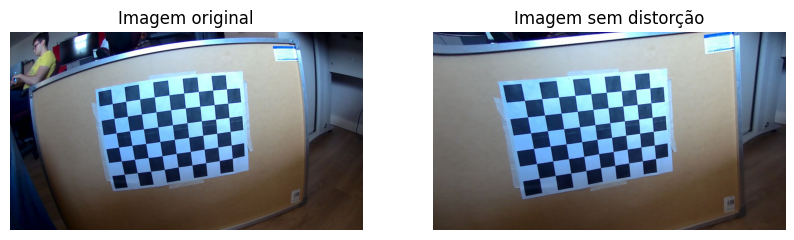

In [10]:
img = cv2.imread('chessboard_images/frame0.png')
# remove a distorcao da imagem
dst = cv2.undistort(img, mtx, dist)

cv2.imwrite('calibresult.png', dst)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Imagem sem distorção')
plt.axis('off')
plt.show()